## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
from keras import optimizers
sgd = optimizers.SGD(lr = 0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
print('x_train', x_train.shape)
print('y_test', y_test.shape)

x_train (50000, 3072)
y_test (10000, 10)


In [7]:
x_train.shape[0]/256

195.3125

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2994 - acc: 0.9002 - val_loss: 0.2824 - val_acc: 0.9009
Epoch 2/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.2751 - acc: 0.9020 - val_loss: 0.2698 - val_acc: 0.9031
Epoch 3/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.2655 - acc: 0.9036 - val_loss: 0.2629 - val_acc: 0.9045
Epoch 4/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.2591 - acc: 0.9050 - val_loss: 0.2571 - val_acc: 0.9053
Epoch 5/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.2538 - acc: 0.9064 - val_loss: 0.2521 - val_acc: 0.9066
Epoch 6/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.2495 - acc: 0.9074 - val_loss: 0.2488 - val_acc: 0.9077
Epoch 7/500
50000/50000 [==============================] - 2s 49us/step - 

Epoch 58/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.1589 - acc: 0.9390 - val_loss: 0.2064 - val_acc: 0.9211
Epoch 59/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.1575 - acc: 0.9396 - val_loss: 0.2239 - val_acc: 0.9154
Epoch 60/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.1566 - acc: 0.9401 - val_loss: 0.2058 - val_acc: 0.9211
Epoch 61/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.1556 - acc: 0.9402 - val_loss: 0.2115 - val_acc: 0.9185
Epoch 62/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.1543 - acc: 0.9410 - val_loss: 0.2182 - val_acc: 0.9180
Epoch 63/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1524 - acc: 0.9414 - val_loss: 0.2313 - val_acc: 0.9146
Epoch 64/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1516 - acc: 0.9420 - val_loss: 0.2198 - val_acc: 0.9171
Epoch 65/500
50000/50000 [=

Epoch 117/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0895 - acc: 0.9676 - val_loss: 0.2563 - val_acc: 0.9138
Epoch 118/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0882 - acc: 0.9678 - val_loss: 0.2648 - val_acc: 0.9114
Epoch 119/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0888 - acc: 0.9677 - val_loss: 0.2853 - val_acc: 0.9086
Epoch 120/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0849 - acc: 0.9692 - val_loss: 0.2568 - val_acc: 0.9149
Epoch 121/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0854 - acc: 0.9693 - val_loss: 0.2953 - val_acc: 0.9084
Epoch 122/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0844 - acc: 0.9695 - val_loss: 0.3067 - val_acc: 0.9079
Epoch 123/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0827 - acc: 0.9697 - val_loss: 0.2773 - val_acc: 0.9116
Epoch 124/500
50000/

50000/50000 [==============================] - 2s 49us/step - loss: 0.0491 - acc: 0.9829 - val_loss: 0.3585 - val_acc: 0.9095
Epoch 176/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0329 - acc: 0.9897 - val_loss: 0.3481 - val_acc: 0.9104
Epoch 177/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0327 - acc: 0.9896 - val_loss: 0.3512 - val_acc: 0.9092
Epoch 178/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0359 - acc: 0.9883 - val_loss: 0.3630 - val_acc: 0.9066
Epoch 179/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0425 - acc: 0.9855 - val_loss: 0.3845 - val_acc: 0.9063
Epoch 180/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0339 - acc: 0.9889 - val_loss: 0.3684 - val_acc: 0.9078
Epoch 181/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0342 - acc: 0.9890 - val_loss: 0.3958 - val_acc: 0.9041
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 0.0132 - acc: 0.9966 - val_loss: 0.4625 - val_acc: 0.9032
Epoch 234/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0117 - acc: 0.9971 - val_loss: 0.4534 - val_acc: 0.9074
Epoch 235/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0089 - acc: 0.9982 - val_loss: 0.4352 - val_acc: 0.9095
Epoch 236/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0080 - acc: 0.9986 - val_loss: 0.4703 - val_acc: 0.9048
Epoch 237/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.6704 - acc: 0.8286 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 238/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.8854 - acc: 0.8200 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 239/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.8854 - acc: 0.8200 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 2s 50us/step - loss: 0.0247 - acc: 0.9921 - val_loss: 0.4059 - val_acc: 0.9072
Epoch 292/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0236 - acc: 0.9929 - val_loss: 0.4077 - val_acc: 0.9063
Epoch 293/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.0220 - acc: 0.9934 - val_loss: 0.4024 - val_acc: 0.9071
Epoch 294/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0214 - acc: 0.9938 - val_loss: 0.4044 - val_acc: 0.9081
Epoch 295/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0199 - acc: 0.9944 - val_loss: 0.4269 - val_acc: 0.9058
Epoch 296/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0201 - acc: 0.9942 - val_loss: 0.4075 - val_acc: 0.9084
Epoch 297/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0191 - acc: 0.9947 - val_loss: 0.4217 - val_acc: 0.9061
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 2s 50us/step - loss: 0.0025 - acc: 0.9998 - val_loss: 0.5135 - val_acc: 0.9068
Epoch 350/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0022 - acc: 0.9999 - val_loss: 0.5117 - val_acc: 0.9067
Epoch 351/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.5150 - val_acc: 0.9071
Epoch 352/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0021 - acc: 0.9999 - val_loss: 0.5163 - val_acc: 0.9070
Epoch 353/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.5173 - val_acc: 0.9069
Epoch 354/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.5175 - val_acc: 0.9071
Epoch 355/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.5439 - val_acc: 0.9043
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5308 - val_acc: 0.9069
Epoch 408/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5330 - val_acc: 0.9072
Epoch 409/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5325 - val_acc: 0.9070
Epoch 410/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5358 - val_acc: 0.9065
Epoch 411/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5351 - val_acc: 0.9070
Epoch 412/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.5339 - val_acc: 0.9067
Epoch 413/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.5374 - val_acc: 0.9066
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 5.2695e-04 - acc: 1.0000 - val_loss: 0.5720 - val_acc: 0.9067
Epoch 465/500
50000/50000 [==============================] - 2s 49us/step - loss: 5.2936e-04 - acc: 1.0000 - val_loss: 0.5708 - val_acc: 0.9066
Epoch 466/500
50000/50000 [==============================] - 2s 49us/step - loss: 5.2085e-04 - acc: 1.0000 - val_loss: 0.5729 - val_acc: 0.9066
Epoch 467/500
50000/50000 [==============================] - 2s 49us/step - loss: 5.2038e-04 - acc: 1.0000 - val_loss: 0.5715 - val_acc: 0.9065
Epoch 468/500
50000/50000 [==============================] - 3s 51us/step - loss: 5.1181e-04 - acc: 1.0000 - val_loss: 0.5729 - val_acc: 0.9068
Epoch 469/500
50000/50000 [==============================] - 3s 50us/step - loss: 5.0531e-04 - acc: 1.0000 - val_loss: 0.5741 - val_acc: 0.9068
Epoch 470/500
50000/50000 [==============================] - 3s 51us/step - loss: 5.0130e-04 - acc: 1.0000 - val_loss: 0.5733 - val_acc: 0.9064
Epoch 

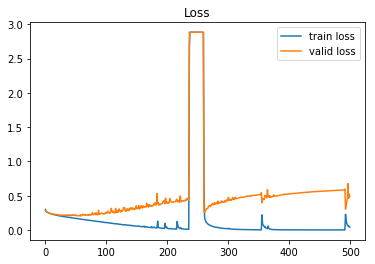

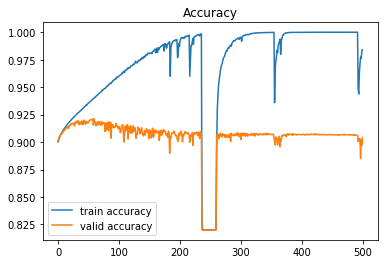

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()